In [1]:
import pandas as pd 
import shap 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

### Carregar dados e visualizar -  Regressao

In [2]:
# Carregar dados
df = pd.read_csv('./datasets/colesterol.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [4]:
# Ajustar dataframe
df.drop('Id', axis=1, inplace=True)

#aplicar one hot nas variaveis categoricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [5]:
df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,False,False,True,False,False,True,False,True,False
1,68,105.0,184,236.98,True,False,False,False,True,False,False,False,True
2,25,64.8,180,161.79,False,False,False,True,True,False,True,False,False
3,43,120.2,167,336.24,True,False,False,False,True,False,True,False,False
4,79,88.5,175,226.23,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,68.1,166,206.81,False,True,False,False,False,True,False,False,True
996,51,47.7,170,128.03,False,False,False,True,True,False,True,False,False
997,39,85.5,176,211.14,False,True,False,False,True,False,False,True,False
998,61,91.2,161,284.53,False,True,False,False,False,True,False,True,False


### Treinar modelo - Regressão

In [6]:
#Separar x e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [7]:
#Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [8]:
# Treinar modelo de regressao sem rfe
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

#### Apresentar plots shapley

In [14]:
explainer_reg = shap.Explainer(model_reg, X_train)
shap_values_reg = explainer_reg(X_test)


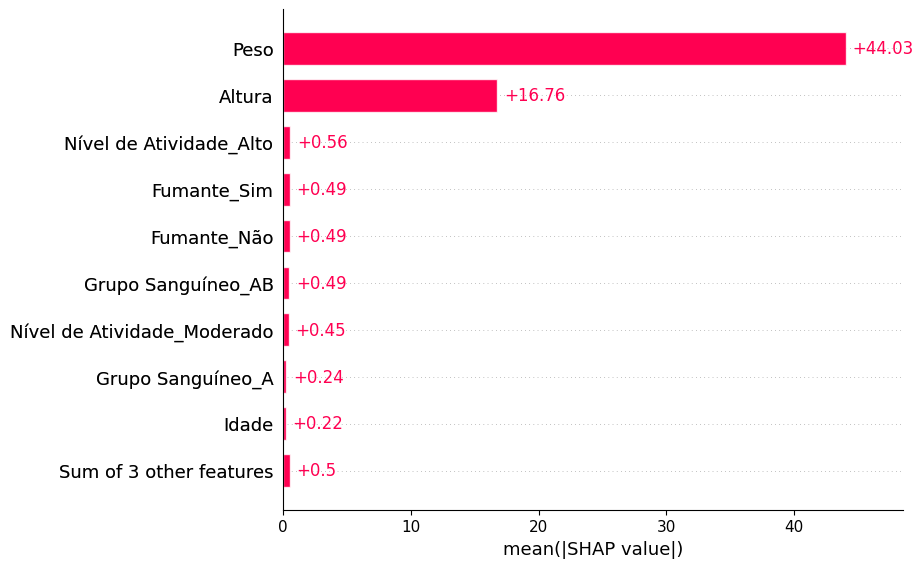

In [15]:
#plotar a importancia geral por shapvalues
shap.plots.bar(shap_values_reg)

In [17]:
# Mostrar a 1a instancia do conjunto de testes
X_test.iloc[0,:]

Idade                             29
Peso                            87.8
Altura                           179
Grupo Sanguíneo_A              False
Grupo Sanguíneo_AB              True
Grupo Sanguíneo_B              False
Grupo Sanguíneo_O              False
Fumante_Não                     True
Fumante_Sim                    False
Nível de Atividade_Alto        False
Nível de Atividade_Baixo        True
Nível de Atividade_Moderado    False
Name: 833, dtype: object

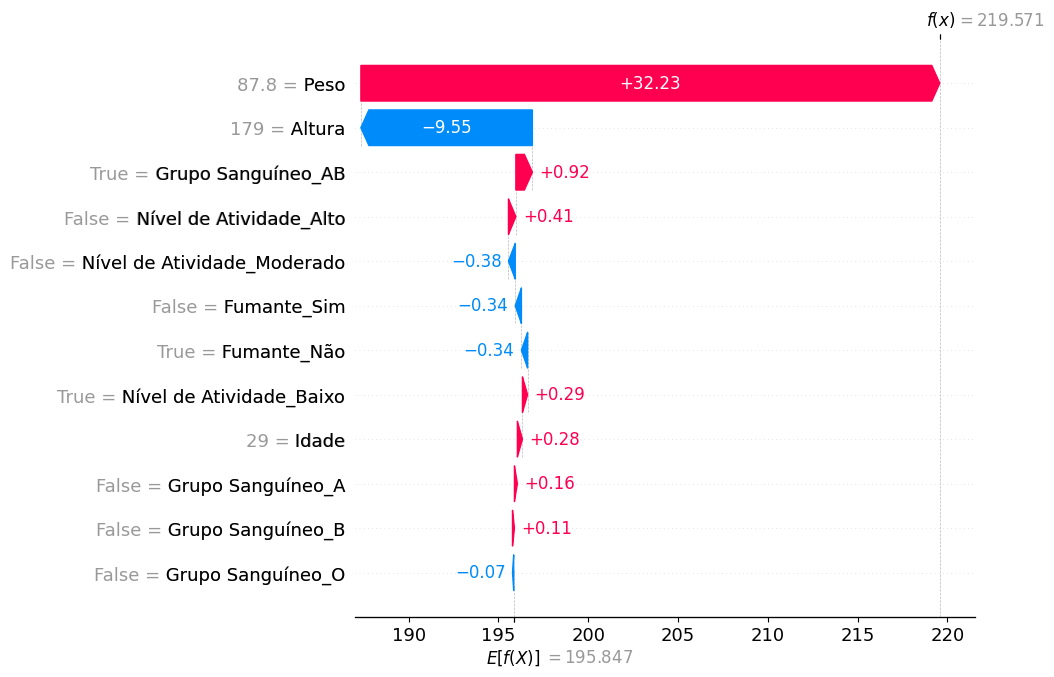

In [18]:
#Plotar o shap values para um exemplo especifico
shap.plots.waterfall(shap_values_reg[0], max_display=13)

In [23]:
# Agora sim, plote o heatmap
shap.plots.heatmap(shap_values_reg, max_display=13)

ValueError: Unsupported dtype object

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

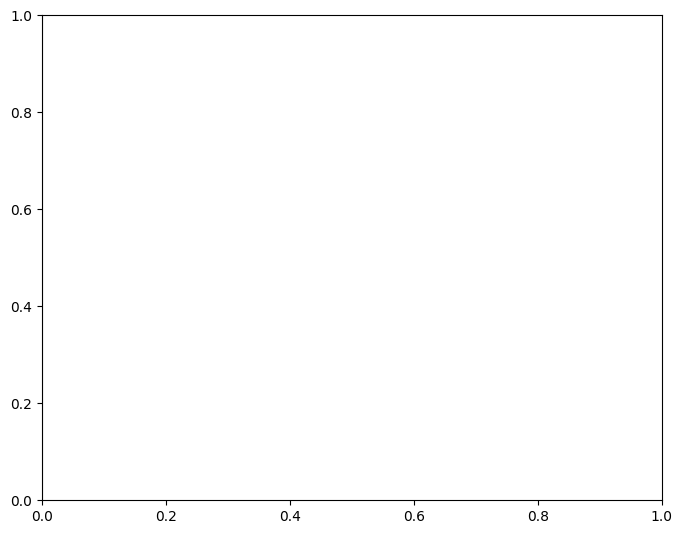

In [24]:
# plot de beewswarm geral
shap.plots.beeswarm(shap_values_reg, max_display=13)

### Carregar dados - Classificação

In [25]:
#carregar dataset
df2 = pd.read_csv('./datasets/frutas.csv')

In [26]:
#ajustar dataframe
#remover coluna A_id
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### treinar modelo de Knn com mudança de K

In [27]:
### Treinar modelo - classressão
#Separar x e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']


In [28]:
#Separar 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

### Treinar mdoelo sem rfe

In [30]:
# Treinar modelo de regressao sem rfe
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

#### Apresentar plots shapley

In [31]:
explainer_class = shap.Explainer(model_lr, X_train)
shap_values_class = explainer_class(X_test)


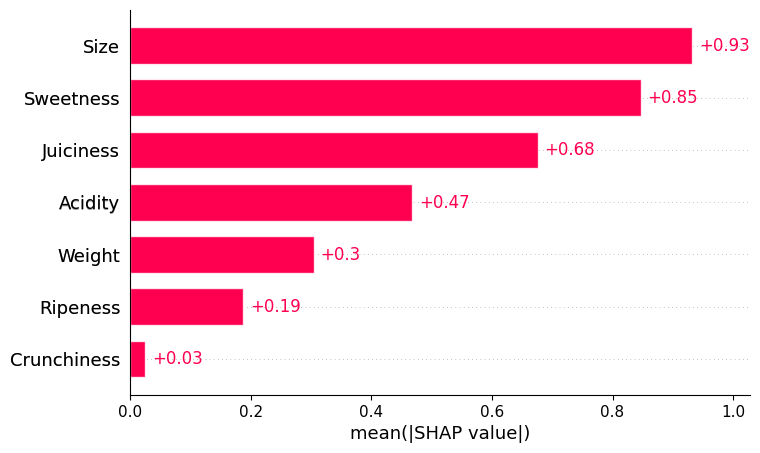

In [32]:
#plotar a importancia geral por shapvalues
shap.plots.bar(shap_values_class)

In [33]:
# Mostrar a 1a instancia do conjunto de testes
X_test.iloc[0,:]

Size           1.819744
Weight        -1.174086
Sweetness     -2.772288
Crunchiness   -0.039636
Juiciness     -1.437848
Ripeness       1.648811
Acidity       -1.098697
Name: 1150, dtype: float64

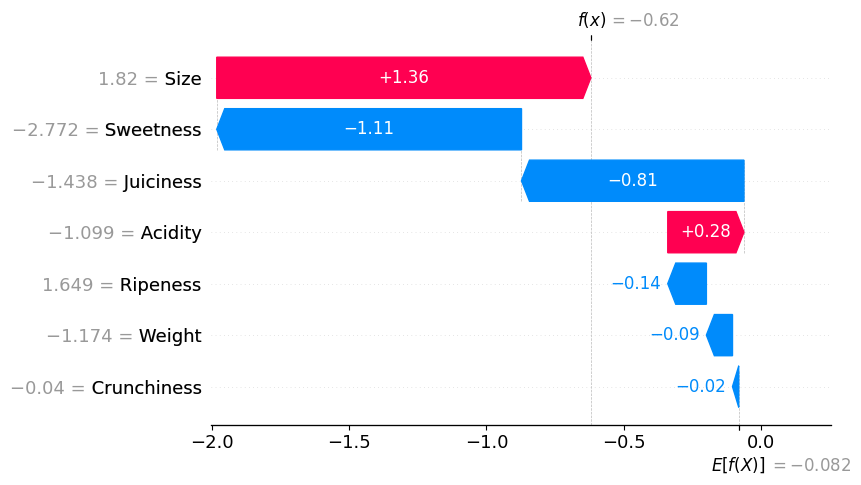

In [34]:
#Plotar o shap values para um exemplo especifico
shap.plots.waterfall(shap_values_class[0], max_display=13)

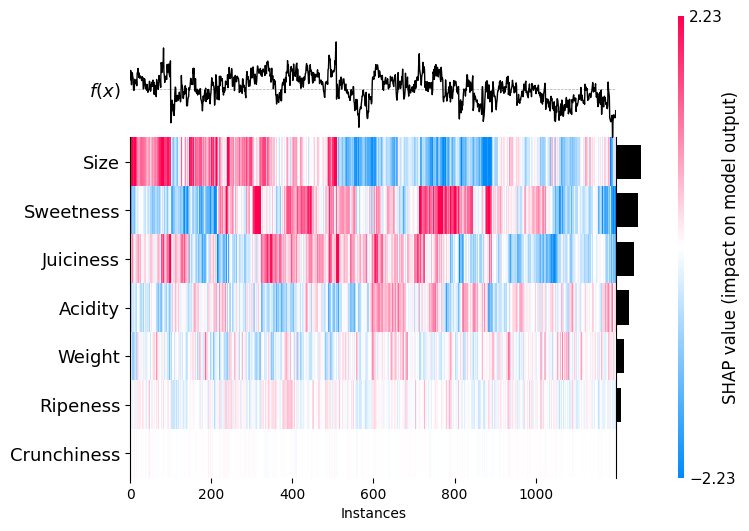

<Axes: xlabel='Instances'>

In [35]:
# Agora sim, plote o heatmap
shap.plots.heatmap(shap_values_class, max_display=13)

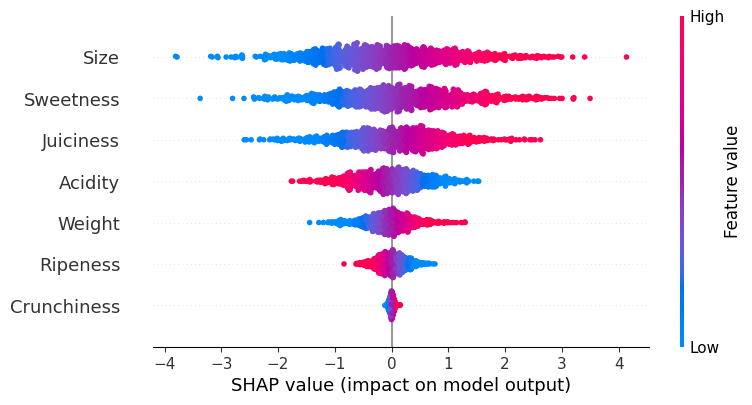

In [36]:
# plot de beewswarm geral
shap.plots.beeswarm(shap_values_class, max_display=13)